# EDA and Data Visualization on Amazon Top 50 bestselling books from 2009 to 2019

### Answers to following contents had been addressed
1. Importing Data
2. Handaling Missing Values
3. Count of Fiction and Non Fiction books by dropping duplicates using 'Name' feature
4. No of books sold in each year based on genre
5. Finding out the count of Republished books
6. Finding out the top books which republished more than or equal to 5 years
7. Average Rating, Average Reviews and Average Prize per year based on genre
8. Top authors based on no.of books published(2009-2019)
9. Average Rating of Top Authors based on no.of books published(2009-2019)
10. Top 50 Books based upon Rating and Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


## *  Importing Data

In [2]:
Raw_dataset = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
Raw_dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
# Rewiewing the dataset

Raw_dataset.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## *  Checking for missing values

In [4]:
Dataset_1 = Raw_dataset.copy()
Dataset_1.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

## *  Count of Fiction and Non Fiction books by dropping duplicates from book Name

<AxesSubplot:xlabel='Genre', ylabel='count'>

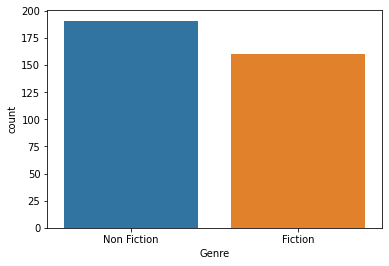

In [5]:
Dataset_1.drop_duplicates(subset='Name',keep="first",inplace=True)
sb.countplot(x='Genre',data=Dataset_1)

<AxesSubplot:xlabel='Genre', ylabel='Reviews'>

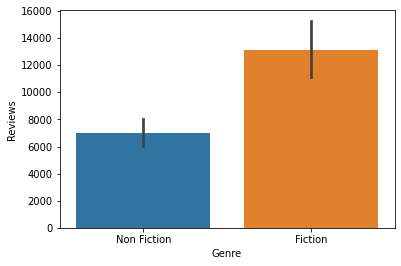

In [6]:
#Differentating between Fiction and Non Fiction by reviews
sb.barplot(x='Genre',y='Reviews',data=Dataset_1)

### .From above graphs 
*         . The Relaese of Non Fiction books is higher as compared to Fiction books
*         . The sale of Fiction books is higher as compared to Non Fiction books(Based upon the reviews).

## *  No of books sold in each year

<AxesSubplot:xlabel='Year', ylabel='count'>

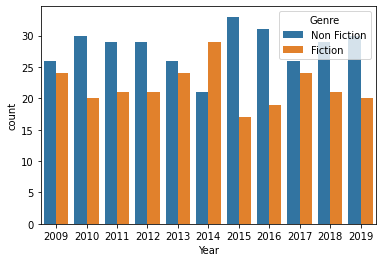

In [7]:
Dataset_2 = Raw_dataset.copy()
sb.countplot(x='Year',data=Dataset_2,hue='Genre')

* From above graph, we can notice that, every year Non Fiction books are sold more than Fiction Books, except in 2014.

## Finding out the count of Republished books

In [8]:
Republished_books=Dataset_2['Name'].value_counts()[Dataset_2['Name'].value_counts()>1].index
len(Republished_books)

96

* Out of total 351 unique books 96 had been republised or resaled more than 1 year

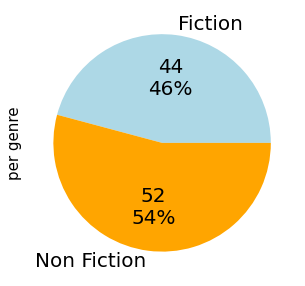

In [9]:
Republished_books_dataset = Dataset_2[Dataset_2['Name'].isin(Republished_books)].drop_duplicates(subset='Name',keep='first')
def label_function(val):
    return f'{val / 100 * len(Republished_books_dataset):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

Republished_books_dataset.groupby('Genre').size().plot(kind='pie',autopct=label_function, textprops={'fontsize': 20},
                                  colors=['lightblue', 'orange'],ax=ax1)
ax1.set_ylabel('per genre',size=15)
plt.show()

* If we notice the chart, Non Fiction books had been resaled more as compared to Fiction books

## Finding out the top books which republished more than or equal to 5 years

In [10]:
Top_Republished_books=Dataset_2['Name'].value_counts()[Dataset_2['Name'].value_counts()>4].index

for item in Top_Republished_books:
    display(Dataset_2[Dataset_2['Name']==item])

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
312,StrengthsFinder 2.0,Gallup,4.0,5069,17,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
375,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2013,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
377,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2016,Non Fiction
378,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2017,Non Fiction
379,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2018,Non Fiction
380,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2019,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
509,To Kill a Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
439,The Official SAT Study Guide,The College Board,4.4,1201,40,2010,Non Fiction
440,The Official SAT Study Guide,The College Board,4.4,1201,40,2011,Non Fiction
441,The Official SAT Study Guide,The College Board,4.4,1201,40,2012,Non Fiction
442,The Official SAT Study Guide,The College Board,4.4,1201,40,2013,Non Fiction
443,The Official SAT Study Guide,The College Board,4.4,1201,40,2014,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
320,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
321,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
322,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2012,Non Fiction
323,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
324,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2014,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2015,Non Fiction
326,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2016,Non Fiction
327,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2017,Non Fiction
328,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2018,Non Fiction
329,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2019,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2011,Non Fiction
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2012,Non Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
208,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2013,Non Fiction
209,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2014,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
211,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2016,Non Fiction
212,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
166,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2014,Non Fiction
167,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2015,Non Fiction
168,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2016,Non Fiction
169,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2017,Non Fiction
170,How to Win Friends & Influence People,Dale Carnegie,4.7,25001,11,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
110,First 100 Words,Roger Priddy,4.7,17323,4,2014,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
112,First 100 Words,Roger Priddy,4.7,17323,4,2016,Non Fiction
113,First 100 Words,Roger Priddy,4.7,17323,4,2017,Non Fiction
114,First 100 Words,Roger Priddy,4.7,17323,4,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
124,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2016,Fiction
125,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2017,Fiction
126,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2018,Fiction
127,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
369,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2009,Non Fiction
370,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2010,Non Fiction
371,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2011,Non Fiction
372,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2012,Non Fiction
373,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2013,Non Fiction


## Average Rating, Average Reviews and Average Prize per year based on genre

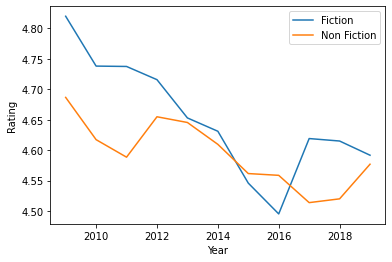

In [11]:
# Average Reviews per year based on genre

dd= Raw_dataset.copy()
df = [x for _, x in dd.groupby('Genre')]
FB = df[0]
NFB = df[1]

def Reverse(lst):
    return [ele for ele in reversed(lst)]

dq = Dataset_2['Year'].value_counts()[Dataset_2['Year'].value_counts()>1].index
Year = Reverse(dq)


plt.plot(Year,FB.groupby('Year').mean()['User Rating'],label = "Fiction")
plt.plot(Year,NFB.groupby('Year').mean()['User Rating'],label = "Non Fiction")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()
plt.show()

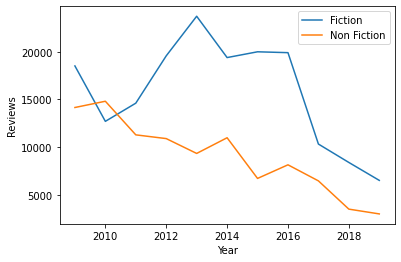

In [12]:
# Average Reviews per year based on genre

plt.plot(Year,FB.groupby('Year').mean()['Reviews'],label = "Fiction")
plt.plot(Year,NFB.groupby('Year').mean()['Reviews'],label = "Non Fiction")
plt.xlabel("Year")
plt.ylabel("Reviews")
plt.legend()
plt.show()

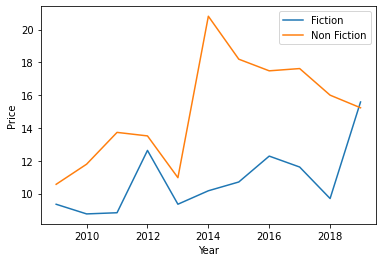

In [13]:
# Average Price per year based on genre

plt.plot(Year,FB.groupby('Year').mean()['Price'],label = "Fiction")
plt.plot(Year,NFB.groupby('Year').mean()['Price'],label = "Non Fiction")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

# Top authors based on no.of books published(2009-2019)

Text(0.5, 0, 'Authors')

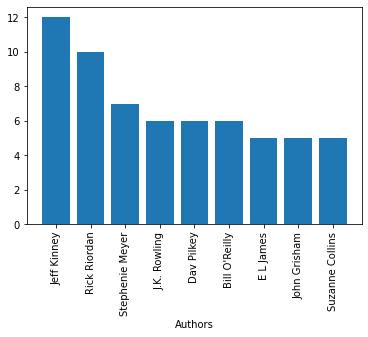

In [14]:
Authors_with_multiple_publications=Dataset_1['Author'].value_counts()[Dataset_1['Author'].value_counts()>4].index
ab = []
for item in Authors_with_multiple_publications:
    ab.append(Dataset_1[Dataset_1['Author'] == item].Name.count())


plt.bar(Authors_with_multiple_publications,ab)
plt.xticks(rotation=90)
plt.xlabel('Authors')

# Average Rating of Top Authors based on no.of books published(2009-2019)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

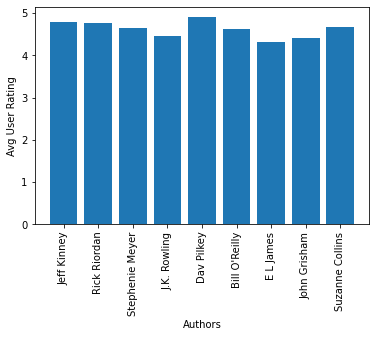

In [15]:
mr = Dataset_1.copy()
mc = mr.groupby('Author',as_index=False)['User Rating'].mean()
md = mc[mc['Author'].isin(Authors_with_multiple_publications)]
sorter_index = dict(zip(Authors_with_multiple_publications,range(len(Authors_with_multiple_publications))))
md['sort']=md['Author'].map(sorter_index)
md.sort_values('sort',ascending=True,inplace=True)
md.drop('sort',axis=1,inplace=True)

plt.bar(md['Author'],md['User Rating'])
plt.xlabel('Authors')
plt.ylabel('Avg User Rating')
plt.xticks(rotation=90)

# Top 50 Books based upon Rating and Reviews

In [16]:
#Multi-Level Sorting 
ds = Dataset_1.copy()
ds.sort_values(by=["User Rating","Reviews"],ascending=False,inplace=True)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_columns", 100)
ds.reset_index(drop=True,inplace=True)
ds.head(50)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
1,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction
2,Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,4.9,19576,8,2011,Non Fiction
3,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
5,Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Dav Pilkey,4.9,12619,8,2019,Fiction
6,Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book...,Jill Twiss,4.9,11881,13,2018,Fiction
7,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052,22,2016,Fiction
8,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
9,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction
